# Klasterizacija automobila na trzistu - Nenadgledano učenje

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.covariance import EllipticEnvelope


### Data manipulation

In [156]:
data_frame = pd.read_csv("cardekho_dataset.csv")

inicial_count = len(data_frame)
data_frame.dropna(inplace=True)
count_after_missig_values = len(data_frame)
print("Droped " + str(inicial_count-count_after_missig_values) + " rows with missing values")

# Deleting unvanted column for indexing
data_frame.drop("Unnamed: 0", axis=1, inplace=True) 
data_frame.drop("brand", axis=1, inplace=True)
data_frame.drop("model", axis=1, inplace=True)
data_frame_shuffled = data_frame.sample(frac=1) # Shuffle
data_frame_shuffled.reset_index(drop=True, inplace=True)
data_frame_shuffled_original = pd.DataFrame(data_frame_shuffled)
data_frame_shuffled.drop("car_name", axis=1, inplace=True)


# Enumerate the categorical features
# car_name_mapping = {car_name: idx for idx, car_name in enumerate(data_frame_shuffled['car_name'].unique())}
# data_frame_shuffled['car_name'] = data_frame_shuffled['car_name'].map(car_name_mapping)

fuel_type_mapping = {fuel_type: idx for idx, fuel_type in enumerate(data_frame['fuel_type'].unique())}
data_frame_shuffled['fuel_type'] = data_frame_shuffled['fuel_type'].map(fuel_type_mapping)

transmission_type_mapping = {trans_type: idx for idx, trans_type in enumerate(data_frame['transmission_type'].unique())}
data_frame_shuffled['transmission_type'] = data_frame_shuffled['transmission_type'].map(transmission_type_mapping)

transmission_type_mapping = {seller_type: idx for idx, seller_type in enumerate(data_frame['seller_type'].unique())}
data_frame_shuffled['seller_type'] = data_frame_shuffled['seller_type'].map(transmission_type_mapping)

transmission_type_mapping = {seats: idx for idx, seats in enumerate(data_frame['seats'].unique())}
data_frame_shuffled['seats'] = data_frame_shuffled['seats'].map(transmission_type_mapping)

# Display the enumerated data
data_frame_shuffled.head()

# Extract numerical features for clustering
numerical_features = ['vehicle_age', 'km_driven', 'selling_price', 'max_power', 'engine', 'mileage']

outlier_detector = EllipticEnvelope(contamination=.01)

# Fit detector
outlier_detector.fit(data_frame_shuffled[numerical_features])

# Predict outliers
outliers = outlier_detector.predict(data_frame_shuffled[numerical_features])
outliers_indices = outliers == -1
data_frame_shuffled = data_frame_shuffled[~outliers_indices]
data_frame_shuffled_original = data_frame_shuffled_original[~outliers_indices]

# Standardize the numerical features
scaler = MinMaxScaler(feature_range=(-1, 1))
data_frame_shuffled[numerical_features] = scaler.fit_transform(data_frame_shuffled[numerical_features])

data_frame_shuffled.tail()


Droped 0 rows with missing values


,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,-0.655172,-0.754694,1,1,0,0.290323,-0.805056,-0.756560,0,-0.735264
15407,-0.793103,-0.859975,0,1,0,0.290323,-0.805056,-0.756560,0,-0.644261
15408,-0.448276,-0.820547,1,1,0,-0.115975,-0.713796,-0.659621,0,-0.844881
15409,-0.793103,-0.859975,0,1,0,0.519201,-0.891174,-0.851312,0,-0.871768
15410,0.103448,-0.567384,1,0,1,-0.715822,-0.269923,-0.200194,0,-0.842399


### Elbow metoda za odredjianje broja klastera

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

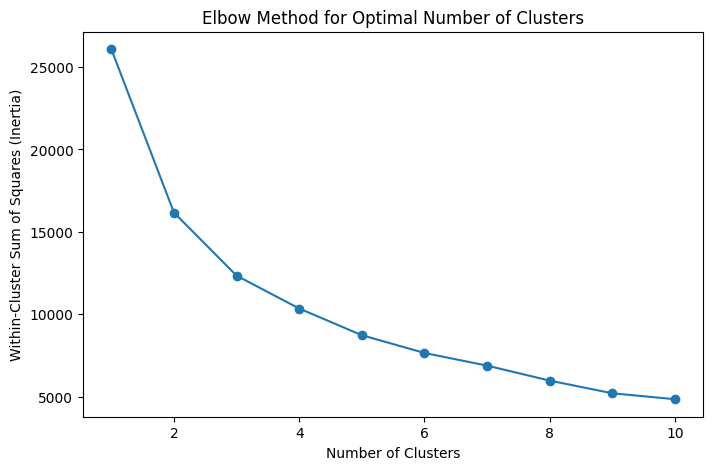

In [157]:
inertia_values = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_frame_shuffled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

### Klasterizacija k-means algoritmom

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


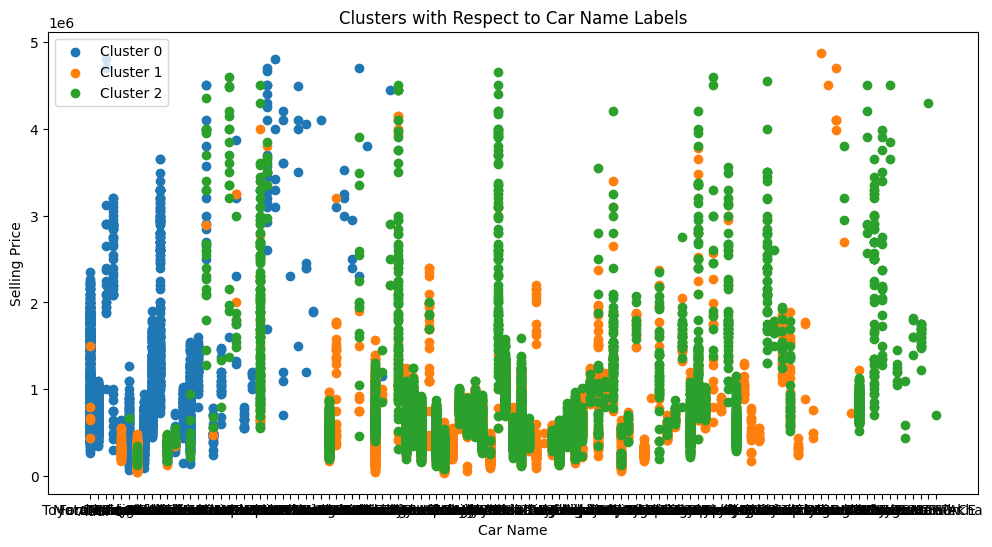

In [163]:
# Apply K-Means clustering
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_frame_shuffled['cluster'] = kmeans.fit_predict(data_frame_shuffled)

data_frame_shuffled_original['cluster'] = data_frame_shuffled['cluster']


data_frame_shuffled_original.to_csv('result.csv')

# Plot clusters with respect to 'car_name'
plt.figure(figsize=(12, 6))
for cluster_id in range(num_clusters):
    cluster_data = data_frame_shuffled_original[data_frame_shuffled_original['cluster'] == cluster_id]
    plt.scatter(cluster_data['car_name'], cluster_data['selling_price'], label=f'Cluster {cluster_id}')

plt.xlabel('Car Name')
plt.ylabel('Selling Price')
plt.title('Clusters with Respect to Car Name Labels')
plt.legend()
plt.show()
